In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
image_size = 160
train_data = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/train',
                                                                 image_size=(image_size, image_size))


Found 3115 files belonging to 36 classes.


In [4]:

val_data = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/validation',
                                                                 image_size=(image_size, image_size))

test_data = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/test',
                                                                 image_size=(image_size, image_size))

Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [5]:
class_name = train_data.class_names
print(class_name)
print(len(class_name) , "Classes")

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
36 Classes


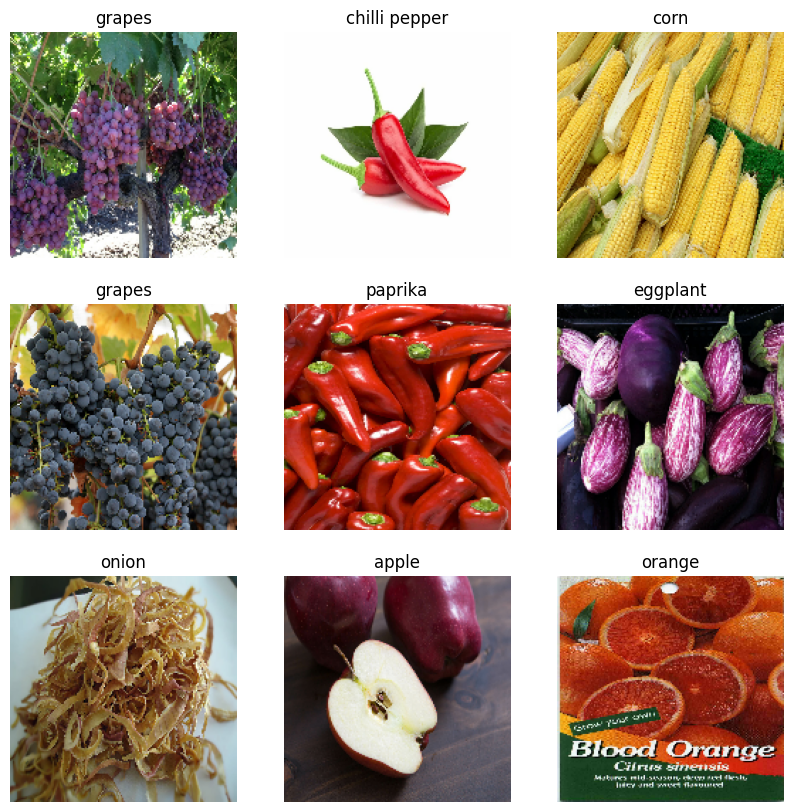

In [6]:
plt.figure(figsize=(10, 10))

for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_name[labels[i]])
    plt.axis('off')
     

In [7]:
for image_batch, label_batch in train_data:
  print("Image Batch Shape :", image_batch.shape)
  print("Image Labels Shape :", label_batch.shape)
  break
  
print("\nImage before formating : ")
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

Image Batch Shape : (32, 160, 160, 3)
Image Labels Shape : (32,)

Image before formating : 
0.0 255.0


In [8]:
def format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.0
  return image, label

In [9]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
train = train_data.map(format)
validation = val_data.map(format)
test = test_data.map(format)

In [11]:
for image_batch, label_batch in train:
  print("Image Batch Shape :", image_batch.shape)
  print("Image Labels Shape :", label_batch.shape)
  break
  
print("\nImage after formating : ")
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

Image Batch Shape : (32, 160, 160, 3)
Image Labels Shape : (32,)

Image after formating : 
0.0 1.0


In [12]:
train_images = []
train_labels = []
for images, labels in train:
    for image in images:
        train_images.append(image)
    for label in labels:
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print("Train Images Shape :", train_images.shape)
print("Train Labels Shape :", train_labels.shape)

Train Images Shape : (3115, 160, 160, 3)
Train Labels Shape : (3115,)


In [13]:
import numpy as np
import pandas as pd

# Example image data: shape (3115, 160, 160, 3)
# Assuming train_images is your array of shape (3115, 160, 160, 3)

# Reshape the array to 2D: each row is a flattened image
num_images = train_images.shape[0]
flattened_images = train_images.reshape(num_images, -1)

# Convert the flattened images to a pandas DataFrame
df1 = pd.DataFrame(flattened_images)
df2=pd.DataFrame(train_labels)

In [15]:
df_train = pd.concat([df1, df2], axis=1)

In [16]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,76791,76792,76793,76794,76795,76796,76797,76798,76799,0
0,0.560225,0.597210,0.270764,0.616970,0.650803,0.262820,0.675109,0.723952,0.211060,0.768107,...,0.228014,0.255465,0.046710,0.135973,0.159837,0.019396,0.267916,0.295367,0.092856,16
1,0.262745,0.262745,0.270588,0.280644,0.280644,0.288487,0.297442,0.297442,0.305285,0.268913,...,0.092712,0.096634,0.104477,0.096128,0.100049,0.107892,0.116131,0.120052,0.127895,30
2,0.394510,0.584078,0.156549,0.449020,0.605412,0.238980,0.416078,0.609804,0.217647,0.380392,...,0.913725,0.921569,0.901961,0.909804,0.917647,0.905882,0.906274,0.917255,0.890196,30
3,0.928627,0.527353,0.284706,0.905000,0.585588,0.378333,0.886667,0.555588,0.352059,0.849314,...,0.225401,0.150108,0.059913,0.514746,0.462784,0.469743,0.486567,0.276274,0.134019,2
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110,0.211765,0.180392,0.168627,0.211765,0.180392,0.168627,0.211765,0.180392,0.168627,0.211765,...,0.262316,0.219179,0.203493,0.291402,0.248265,0.232579,0.277328,0.242034,0.222426,13
3111,0.842790,0.652104,0.434089,0.881213,0.720061,0.484277,0.951164,0.786826,0.505331,0.980402,...,0.583634,0.366651,0.186507,0.617630,0.420511,0.233745,0.700149,0.506435,0.318535,27
3112,0.886275,0.886275,0.886275,0.886275,0.886275,0.886275,0.891863,0.891863,0.891863,0.891863,...,0.800588,0.800588,0.808431,0.799549,0.799549,0.807392,0.815372,0.815372,0.823215,22
3113,0.333333,0.345098,0.229020,0.152588,0.196902,0.129451,0.085294,0.160980,0.042745,0.054824,...,0.061568,0.075294,0.109411,0.070548,0.059960,0.097608,0.008626,0.008235,0.056077,30


In [17]:
val_images = []
val_labels = []
for images, labels in validation:
    for image in images:
        val_images.append(image)
    for label in labels:
        val_labels.append(label)

val_images = np.array(val_images)
val_labels = np.array(val_labels)
print("Validation Images Shape :", val_images.shape)
print("Validation Labels Shape :", val_labels.shape)

Validation Images Shape : (351, 160, 160, 3)
Validation Labels Shape : (351,)


In [18]:
test_images = []
test_labels = []
for images, labels in test:
    for image in images:
        test_images.append(image)
    for label in labels:
        test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)
print("Test Images Shape :", test_images.shape)
print("Test Labels Shape :", test_labels.shape)

Test Images Shape : (359, 160, 160, 3)
Test Labels Shape : (359,)


# KNN

In [19]:
train_images.shape[0]

3115

For n = 1
Validation Accuracy: 0.9715099715099715
For n = 2
Validation Accuracy: 0.8148148148148148
For n = 3
Validation Accuracy: 0.7635327635327636
For n = 4
Validation Accuracy: 0.7150997150997151
For n = 5
Validation Accuracy: 0.6524216524216524
For n = 6
Validation Accuracy: 0.603988603988604
For n = 7
Validation Accuracy: 0.5669515669515669
For n = 8
Validation Accuracy: 0.5242165242165242
For n = 9
Validation Accuracy: 0.5128205128205128
For n = 10
Validation Accuracy: 0.49002849002849



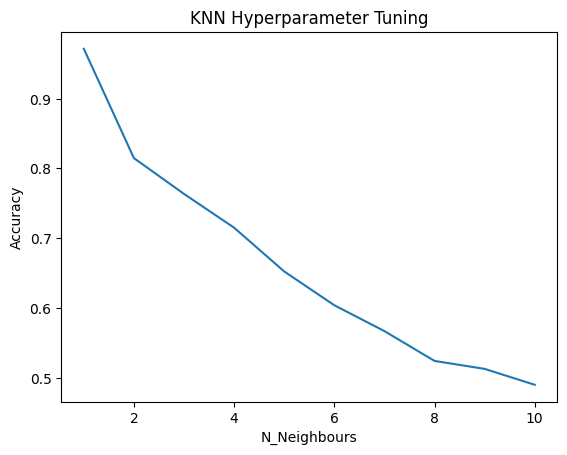

In [20]:
# Hyper Parameter Tuning
from sklearn.neighbors import KNeighborsClassifier

index = []
accuracies = []

for n in range(1, 11):
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_images.reshape(train_images.shape[0], -1), train_labels)

    # Evaluate model
    val_pred = knn.predict(val_images.reshape(val_images.shape[0], -1))
    accuracy = np.mean(val_pred == val_labels)
    print("For n =", n)
    print("Validation Accuracy:", accuracy)

    # For Graph Plot
    index.append(n)
    accuracies.append(accuracy)

# Visualization
print()
plt.plot(index, accuracies)
plt.xlabel("N_Neighbours")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.show()

In [21]:
# Tuned KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_images.reshape(train_images.shape[0], -1), train_labels)

# Evaluate model
val_pred = knn.predict(val_images.reshape(val_images.shape[0], -1))
accuracy = np.mean(val_pred == val_labels)
print("Validation Accuracy:", accuracy)

test_pred = knn.predict(test_images.reshape(test_images.shape[0], -1))
accuracy = np.mean(test_pred == test_labels)
print("Testing Accuracy:", accuracy)

Validation Accuracy: 0.9715099715099715
Testing Accuracy: 0.9721448467966574


# RandomForestClassifier Model

For n = 5
Validation Accuracy: 0.9430199430199431
For n = 10
Validation Accuracy: 0.9658119658119658
For n = 15
Validation Accuracy: 0.9629629629629629
For n = 20
Validation Accuracy: 0.9629629629629629
For n = 25
Validation Accuracy: 0.9629629629629629
For n = 30
Validation Accuracy: 0.9686609686609686
For n = 35
Validation Accuracy: 0.9629629629629629



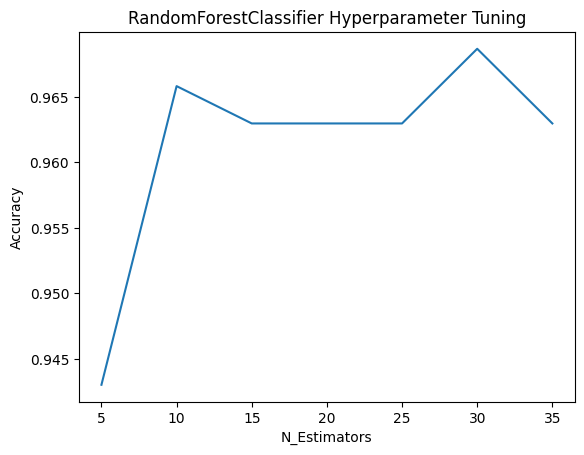

In [22]:
# Hyper Parameter Tuning
from sklearn.ensemble import RandomForestClassifier

index = []
accuracies = []

for n in range(5,40, 5):
  # Train RandomForestClassifier
  RF_model = RandomForestClassifier(n_estimators = n, random_state = 42)
  RF_model.fit(train_images.reshape(train_images.shape[0], -1), train_labels)

  # Evaluate model
  val_pred = RF_model.predict(val_images.reshape(val_images.shape[0], -1))
  accuracy = np.mean(val_pred == val_labels)
  print("For n =", n)
  print("Validation Accuracy:", accuracy)

  # For Graph Plot
  index.append(n)
  accuracies.append(accuracy)

# Visualization
print()
plt.plot(index, accuracies)
plt.xlabel("N_Estimators")
plt.ylabel("Accuracy")
plt.title("RandomForestClassifier Hyperparameter Tuning")
plt.show()

In [23]:
# Tuned RandomForestClassifier Model
RF_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

RF_model.fit(train_images.reshape(train_images.shape[0], -1), train_labels)

# Evaluate model
val_pred = RF_model.predict(val_images.reshape(val_images.shape[0], -1))
accuracy = np.mean(val_pred == val_labels)
print("Validation Accuracy:", accuracy)

test_pred = RF_model.predict(test_images.reshape(test_images.shape[0], -1))
accuracy = np.mean(test_pred == test_labels)
print("Testing Accuracy:", accuracy)

Validation Accuracy: 0.9658119658119658
Testing Accuracy: 0.9665738161559888


# Naive Bayes Model

In [24]:
# Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_images.reshape(train_images.shape[0], -1), train_labels)
 
# Evaluate model
val_pred = gnb.predict(val_images.reshape(val_images.shape[0], -1))
accuracy = np.mean(val_pred == val_labels)
print("Validation Accuracy:", accuracy)

test_pred = gnb.predict(test_images.reshape(test_images.shape[0], -1))
accuracy = np.mean(test_pred == test_labels)
print("Testing Accuracy:", accuracy)    

Validation Accuracy: 0.2678062678062678
Testing Accuracy: 0.26740947075208915


# Logistic Regression Model

In [25]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_images.reshape(train_images.shape[0], -1), train_labels)


# Evaluate model
val_pred = model.predict(val_images.reshape(val_images.shape[0], -1))
accuracy = np.mean(val_pred == val_labels)
print("Validation Accuracy:", accuracy)

test_pred = model.predict(test_images.reshape(test_images.shape[0], -1))
accuracy = np.mean(test_pred == test_labels)
print("Testing Accuracy:", accuracy)

Validation Accuracy: 0.9601139601139601
Testing Accuracy: 0.9610027855153204


# Ensemble Learning

In [26]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('RF', RF_model))
estimators.append(('KNN', knn))
estimators.append(('LR', model))

model_voting_classifier = VotingClassifier(estimators=estimators)
model_voting_classifier.fit(train_images.reshape(train_images.shape[0], -1), train_labels)


# Evaluate model
val_pred = model_voting_classifier.predict(val_images.reshape(val_images.shape[0], -1))
accuracy = np.mean(val_pred == val_labels)
print("Validation Accuracy:", accuracy)

test_pred = model_voting_classifier.predict(test_images.reshape(test_images.shape[0], -1))
accuracy = np.mean(test_pred == test_labels)
print("Testing Accuracy:", accuracy)
     

Validation Accuracy: 0.9715099715099715
Testing Accuracy: 0.9721448467966574


# Prediction Analysis

Knn Prediction : apple

Random Forests Prediction : apple

Logistics Regression Prediction : apple

Voting Classifier Prediction : apple

Image : 


(-0.5, 159.5, 159.5, -0.5)

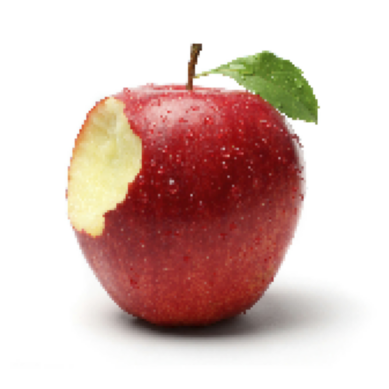

In [33]:
import tensorflow as tf

# read the image
img = tf.io.read_file('/kaggle/input/fruit-and-vegetable-image-recognition/test/apple/Image_1.jpg')
img = tf.image.decode_image(img, channels=3)
img = tf.image.resize(img, (160, 160))


# normalize the pixel values to be between 0 and 1
img = tf.cast(img, tf.float32)
img = img / 255.0
img = np.array(img)


pred = knn.predict(img.reshape(1, -1))
print("Knn Prediction :", class_name[pred[0]])
print()

pred = RF_model.predict(img.reshape(1, -1))
print("Random Forests Prediction :", class_name[pred[0]])
print()

pred = model.predict(img.reshape(1, -1))
print("Logistics Regression Prediction :", class_name[pred[0]])
print()

pred = model_voting_classifier.predict(img.reshape(1, -1))
print("Voting Classifier Prediction :", class_name[pred[0]])
print()

print("Image : ")
img = img * 255.0
plt.imshow(img.astype('uint8'))
plt.axis('off')

# Saving The Model

In [ ]:
import pickle
pickle.dump(model_voting_classifier, open('model.pkl', 'wb'))

# Evaluation Metrics

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

test_pred = model_voting_classifier.predict(test_images.reshape(test_images.shape[0], -1))
print("Precision of the Model : ", precision_score(test_labels, test_pred, average="macro"))
print("Recall of the Model : ", recall_score(test_labels, test_pred, average="macro"))
print("F1-Score of the Model : ", f1_score(test_labels, test_pred, average="macro"))

Precision of the Model :  0.9731762065095398
Recall of the Model :  0.9719135802469138
F1-Score of the Model :  0.9715538847117795


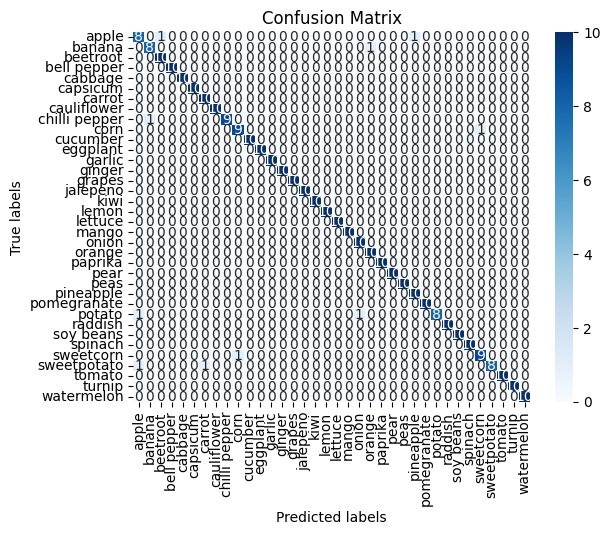

In [32]:
cm = confusion_matrix(test_labels, test_pred)

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_name, yticklabels=class_name)

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Recipe Generation using API

In [34]:
import requests

l = ['apples', 'mango']
s = ""
for i in l:
  s += ","
  s += i
s = s[1:]
print("Recipes with", s, ":")
print()

url = 'https://api.edamam.com/search?q='+s+'&app_id=a5e7c9fd&app_key=3861eff2bdb2906b0b92b241ca2e115b'
response = requests.get(url)

if response.status_code == 200:
    recipes = response.json()['hits']
    count = 1
    for recipe in recipes:
        print(count, ")" ,recipe['recipe']['label'], ":")
        ingr = ""
        for i in recipe['recipe']['ingredientLines']:
          ingr += ("    "+i+"\n")
        print("  Ingredients : ")
        print(ingr)
        print("  Image : ", recipe['recipe']['image'])
        print()
        print("  Source : ", recipe['recipe']['source'])
        print()
        count += 1
else:
    print('Failed to get recipes:', response.status_code)

Recipes with apples,mango :

1 ) British-Style Mango Chutney Recipe :
  Ingredients : 
    1 tablespoon vegetable oil
    1/2 red onion, finely chopped
    1 medium clove garlic, finely chopped (about 1 teaspoon)
    1 inch piece of ginger, finely chopped
    1/2 teaspoon curry powder
    1/4 teaspoon turmeric powder
    1 mango, peeled and cut into 1/2 inch pieces (about 1 1/2 chunks)
    1/2 apple, peeled and grated (about 1/2 cup)
    1/4 cup cider vinegar
    1 tablespoon brown sugar
    1 tablespoon golden raisins
    Kosher salt and freshly ground black pepper

  Image :  https://edamam-product-images.s3.amazonaws.com/web-img/eb0/eb0afc5a3da314b96c62513273cb41fb.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIH%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJHMEUCIFvmaSU06euyP0yBK5XPbLLq6aF5j1Jj671SjA8QYqIKAiEAk4C4%2BuiKpxf6mgMlDIb6cfZ2rXM1W%2FoDJUWOJ4s%2BqwMqwgUI2v%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARAAGgwxODcwMTcxNTA5ODYiDExTmnFKr34dYHVqDSqWBVMAZLFwO0znABFfH7mvjrpMs23mtqh3bPo1zkItJeROwaBo

# Using ANN

In [49]:
train_data_ann = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/fruit-and-vegetable-image-recognition/train',
    
    
    batch_size=32,
    image_size=(28,28)
)
test_data_ann = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/fruit-and-vegetable-image-recognition/test',
    
    
    batch_size=32,
    image_size=(28,28)
)
val_data_ann = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/fruit-and-vegetable-image-recognition/validation',
    
    
    batch_size=32,
    image_size=(28,28)
)

Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [50]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [56]:
def format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.0
  return image, label
train_ann = train_data_ann.map(format)
test_ann = test_data_ann.map(format)

In [61]:
X_train_ann=[]
y_train_ann=[]
for format_image_batch, format_label_batch in train_ann:
    for j in format_image_batch:
        X_train_ann.append(j)
    for j in format_label_batch:
        y_train_ann.append(j)

    
X_test_ann=[]
y_test_ann=[]
for format_image_batch, format_label_batch in test_ann:
    for j in format_image_batch:
        X_test_ann.append(j)
    for j in format_label_batch:
        y_test_ann.append(j)    

In [62]:
import numpy as np
X_train_ann=np.array(X_train_ann)
X_test_ann=np.array(X_test_ann)
y_train_ann=np.array(y_train_ann)
y_test_ann=np.array(y_test_ann)

In [63]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(class_name[y[index]])

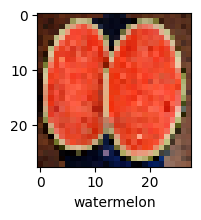

In [68]:
plot_sample(X_train_ann, y_train_ann, 3)

In [75]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(36, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
history=ann.fit(X_train_ann, y_train_ann, epochs=80,validation_data=val_data_ann)

Epoch 1/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.0396 - loss: 3.5918 - val_accuracy: 0.1225 - val_loss: 177.3428
Epoch 2/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1185 - loss: 3.2992 - val_accuracy: 0.1909 - val_loss: 166.3493
Epoch 3/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1632 - loss: 3.0916 - val_accuracy: 0.1681 - val_loss: 281.8394
Epoch 4/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2135 - loss: 2.9145 - val_accuracy: 0.1425 - val_loss: 417.2934
Epoch 5/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2465 - loss: 2.7426 - val_accuracy: 0.3105 - val_loss: 224.1633
Epoch 6/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2922 - loss: 2.6224 - val_accuracy: 0.3048 - val_loss: 258.6155
Epoch 7/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3031 - loss: 2.5115 - val_accuracy: 0.2934 - val_loss: 216.4858
Epoch 8/80
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3381 - loss: 2.4315 - val_accura

In [77]:
test_loss, test_acc = ann.evaluate(X_test_ann, y_test_ann, verbose=1) # verbose is a parameter of how detailed is the log in the console
print("************ Test accuracy : ", test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9589 - loss: 0.2273
************ Test accuracy :  0.9526462554931641


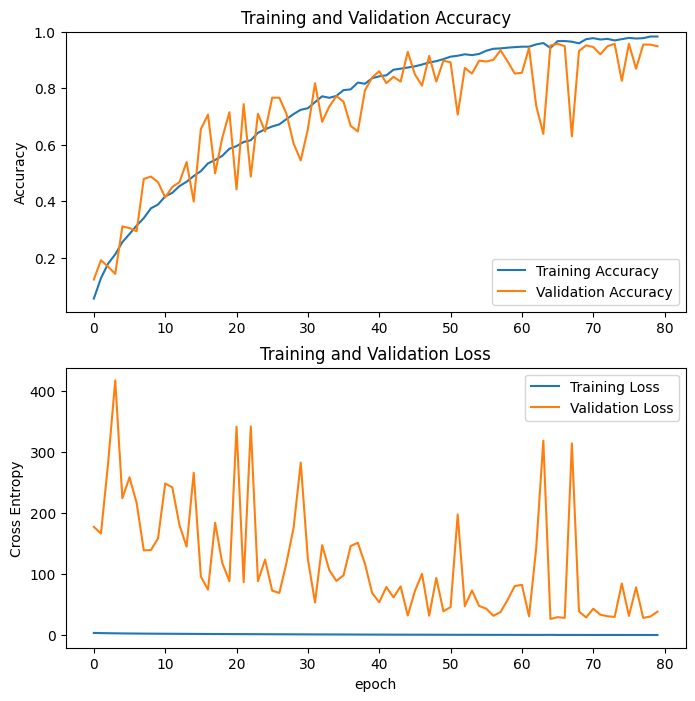

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [80]:
from PIL import Image

# Load the RGB image using Pillow
img = Image.open('/kaggle/input/fruit-and-vegetable-image-recognition/train/apple/Image_1.jpg').convert('RGB')

# Resize the image to 256x256 using Pillow
img = img.resize((28, 28))

# Convert the image to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Convert the numpy array to a tensor
img_tensor = tf.convert_to_tensor(img_array)

a=np.array(img_tensor)

p=[]
p.append(img_tensor)
p=np.array(p)
y_pred = ann.predict(p)
y_classes = [np.argmax(element) for element in y_pred]
print(class_name[y_classes[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
apple


# CNN

In [82]:
batch_size = 32
image_size = 256

train_data_cnn = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/train',
                                                                 image_size=(image_size, image_size),
                                                                 batch_size=batch_size)

val_data_cnn = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/validation',
                                                                 image_size=(image_size, image_size),
                                                                 batch_size=batch_size)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [83]:
def format(image, label):
  image = tf.cast(image, tf.float32)
  image = image/255.0
  return image, label

In [84]:
train_cnn = train_data_cnn.map(format)
val_data_cnn=val_data_cnn.map(format)

In [85]:
X_train=[]
y_train=[]
for format_image_batch, format_label_batch in train_cnn:
    for j in format_image_batch:
        X_train.append(j)
    for j in format_label_batch:
        y_train.append(j)
X_train=np.array(X_train)
y_train=np.array(y_train)

In [86]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [87]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(36, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
cnn_history=cnn.fit(X_train, y_train, epochs=10,validation_data=val_data_cnn)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9722 - loss: 0.1489 - val_accuracy: 0.9573 - val_loss: 0.3291
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.9864 - loss: 0.0974 - val_accuracy: 0.9573 - val_loss: 0.3627
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9932 - loss: 0.0537 - val_accuracy: 0.9601 - val_loss: 0.3755
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9904 - loss: 0.0588 - val_accuracy: 0.9544 - val_loss: 0.3262
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9912 - loss: 0.0555 - val_accuracy: 0.9573 - val_loss: 0.3169
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - accuracy: 0.9906 - loss: 0.0451 - val_accuracy: 0.9630 - val_loss: 0.2940
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9917 - loss: 0.0334 - val_accuracy: 0.9630 - val_loss: 0.3729
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9926 - loss: 0.0424 - val_accuracy: 0.9601 -

# CNN_WITH_AUGMENTATION

In [111]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [112]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    shear_range=0.2,
    rotation_range=40,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

training_set = train_datagen.flow_from_directory(
    '/kaggle/input/fruit-and-vegetable-image-recognition/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 3115 images belonging to 36 classes.


In [113]:
val_datagen = ImageDataGenerator(rescale=1/255.)

validation_set = val_datagen.flow_from_directory(
    '/kaggle/input/fruit-and-vegetable-image-recognition/validation',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

Found 351 images belonging to 36 classes.


In [114]:
test_datagen = ImageDataGenerator(rescale=1/255.)

test_set = test_datagen.flow_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/test',
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='categorical')

Found 359 images belonging to 36 classes.


In [115]:
classes = train_data.class_names
print(classes)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [116]:
model = Sequential([
    Conv2D(filters=32, activation='relu', kernel_size=(3,3), input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=128, activation='relu', kernel_size=(3,3)),
    BatchNormalization(),
    Dropout(0.25),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=256, activation='relu', kernel_size=(3,3)),
    BatchNormalization(),
    Dropout(0.3),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=36, activation='softmax')
])



In [117]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 469,028 (1.79 MB)

 Trainable params: 468,004 (1.79 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [119]:
# Train the model
history = model.fit(
    training_set,
    epochs=20,
    batch_size=32,
    validation_data=validation_set
)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 101s 888ms/step - accuracy: 0.0505 - loss: 4.0542 - val_accuracy: 0.0285 - val_loss: 3.6679
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 792ms/step - accuracy: 0.1534 - loss: 3.1463 - val_accuracy: 0.0513 - val_loss: 3.8283
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 798ms/step - accuracy: 0.1792 - loss: 2.8607 - val_accuracy: 0.0598 - val_loss: 4.0134
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 800ms/step - accuracy: 0.2052 - loss: 2.7417 - val_accuracy: 0.0712 - val_loss: 4.1282
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 790ms/step - accuracy: 0.2242 - loss: 2.6112 - val_accuracy: 0.1909 - val_loss: 2.7231
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 798ms/step - accuracy: 0.2517 - loss: 2.5376 - val_accuracy: 0.2564 - val_loss: 2.6726
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 792ms/step - accuracy: 0.2588 - loss: 2.4830 - val_accuracy: 0.2393 - val_loss: 2.6637
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 793ms/step - accuracy: 0.2938 - loss: 2.3706 - val_acc

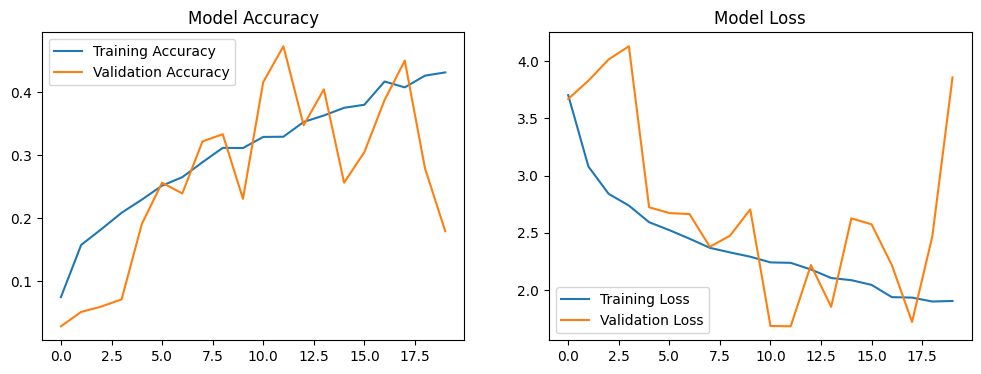

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [123]:
from PIL import Image

# Load the RGB image using Pillow
img = Image.open('/kaggle/input/fruit-and-vegetable-image-recognition/validation/banana/Image_10.jpg').convert('RGB')

# Resize the image to 256x256 using Pillow
img = img.resize((64, 64))

# Convert the image to a numpy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Convert the numpy array to a tensor
img_tensor = tf.convert_to_tensor(img_array)

# Print the shape of the tensor
print(img_tensor.shape)

(64, 64, 3)


In [124]:
a=np.array(img_tensor)
p=[]
p.append(img_tensor)
p=np.array(p)
y_pred = model.predict(p)
y_classes = [np.argmax(element) for element in y_pred]
print((classes[y_classes[0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
lemon


# ResNet50

In [125]:
img_height,img_width=256,256
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/train',labels='inferred',
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)


val_ds = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/fruit-and-vegetable-image-recognition/validation',labels='inferred',
                                                             image_size=(img_height, img_width),
                                                             batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


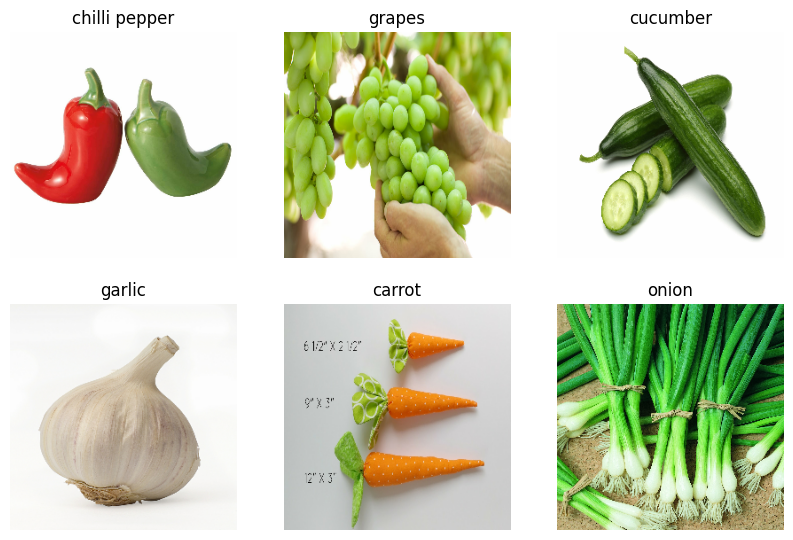

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [127]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=36,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(36, activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [128]:
resnet_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [133]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

In [134]:
resnet_model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=7
)

Epoch 1/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 52s 409ms/step - accuracy: 0.4441 - loss: 2.2136 - val_accuracy: 0.8860 - val_loss: 0.3620
Epoch 2/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 294ms/step - accuracy: 0.8383 - loss: 0.5431 - val_accuracy: 0.9088 - val_loss: 0.2701
Epoch 3/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - accuracy: 0.8983 - loss: 0.3391 - val_accuracy: 0.9459 - val_loss: 0.1728
Epoch 4/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 294ms/step - accuracy: 0.9412 - loss: 0.1950 - val_accuracy: 0.9516 - val_loss: 0.1573
Epoch 5/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 293ms/step - accuracy: 0.9532 - loss: 0.1597 - val_accuracy: 0.9573 - val_loss: 0.1644
Epoch 6/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 293ms/step - accuracy: 0.9666 - loss: 0.1153 - val_accuracy: 0.9487 - val_loss: 0.1581
Epoch 7/7
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.9766 - loss: 0.0858 - val_accuracy: 0.9772 - val_loss: 0.1113


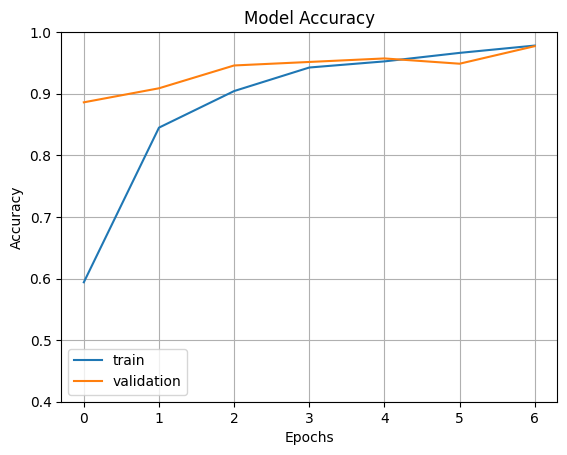

In [135]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

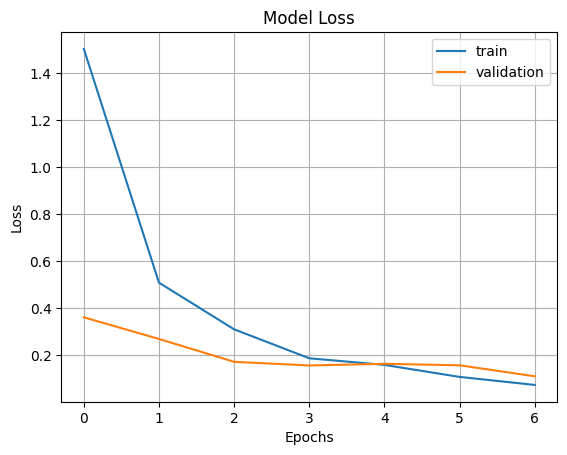

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [137]:
import cv2
image=cv2.imread('/kaggle/input/fruit-and-vegetable-image-recognition/test/pear/Image_1.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)
pred=resnet_model.predict(image)
print(pred)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[7.3229126e-04 6.0388732e-07 4.0690855e-05 8.2015100e-07 1.7870268e-06
  2.0941413e-06 1.8692051e-06 1.3393873e-07 2.4209934e-05 8.5513348e-05
  2.0027241e-05 2.8323131e-03 6.7032079e-06 6.3178840e-09 2.7045881e-04
  6.9592614e-04 4.3147681e-03 1.2416456e-02 8.8822600e-07 1.6217001e-04
  2.8771181e-05 1.1952809e-02 8.9274306e-07 9.6507472e-01 3.9388918e-04
  4.5888278e-06 3.7421467e-04 2.5371126e-06 4.0060077e-05 3.8395374e-05
  1.1326764e-06 1.9178977e-05 1.4673126e-06 3.2234242e-05 8.2944927e-05
  3.4241911e-04]]
The predicted class is pear
